<a href="https://colab.research.google.com/github/mukulsingh11/Deep-Learning-/blob/main/MNIST_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [5]:
import tensorflow as tf

In [6]:
mnist = tf.keras.datasets.mnist

In [7]:
mnist

<module 'keras.api._v2.keras.datasets.mnist' from '/usr/local/lib/python3.10/dist-packages/keras/api/_v2/keras/datasets/mnist/__init__.py'>

In [8]:
mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

## Split the train and test set

In [9]:
(X_train_full , y_train_full) ,(X_test , y_test) = mnist.load_data()

In [10]:
X_train_full.shape

(60000, 28, 28)

 * it is indicated the 3D image  shape

In [11]:
X_train_full[5000]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

* Astract 5000 image , 5000 is index number

In this dataframe indiacted the 0 and some numbers mean 0 is indicated the White and 255 is indicated the Black
---



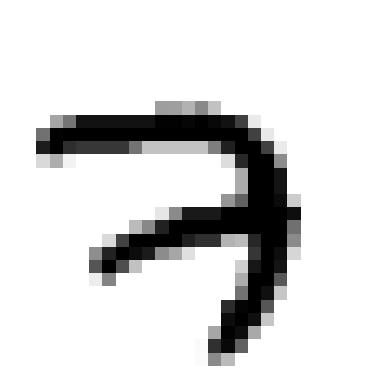

In [12]:
# visualization

plt.imshow(X_train_full[5000],cmap='binary')
plt.axis('off')
plt.show()


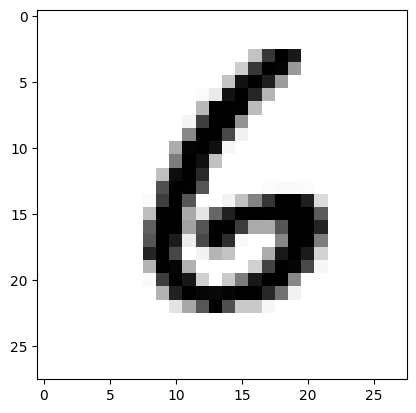

In [13]:
plt.imshow(X_train_full[6000],cmap='binary')

* How to convert the number like array --- it is look like a box-pixel size
* image is collection of pixles size,  our pixles size is 0-255

<Axes: >

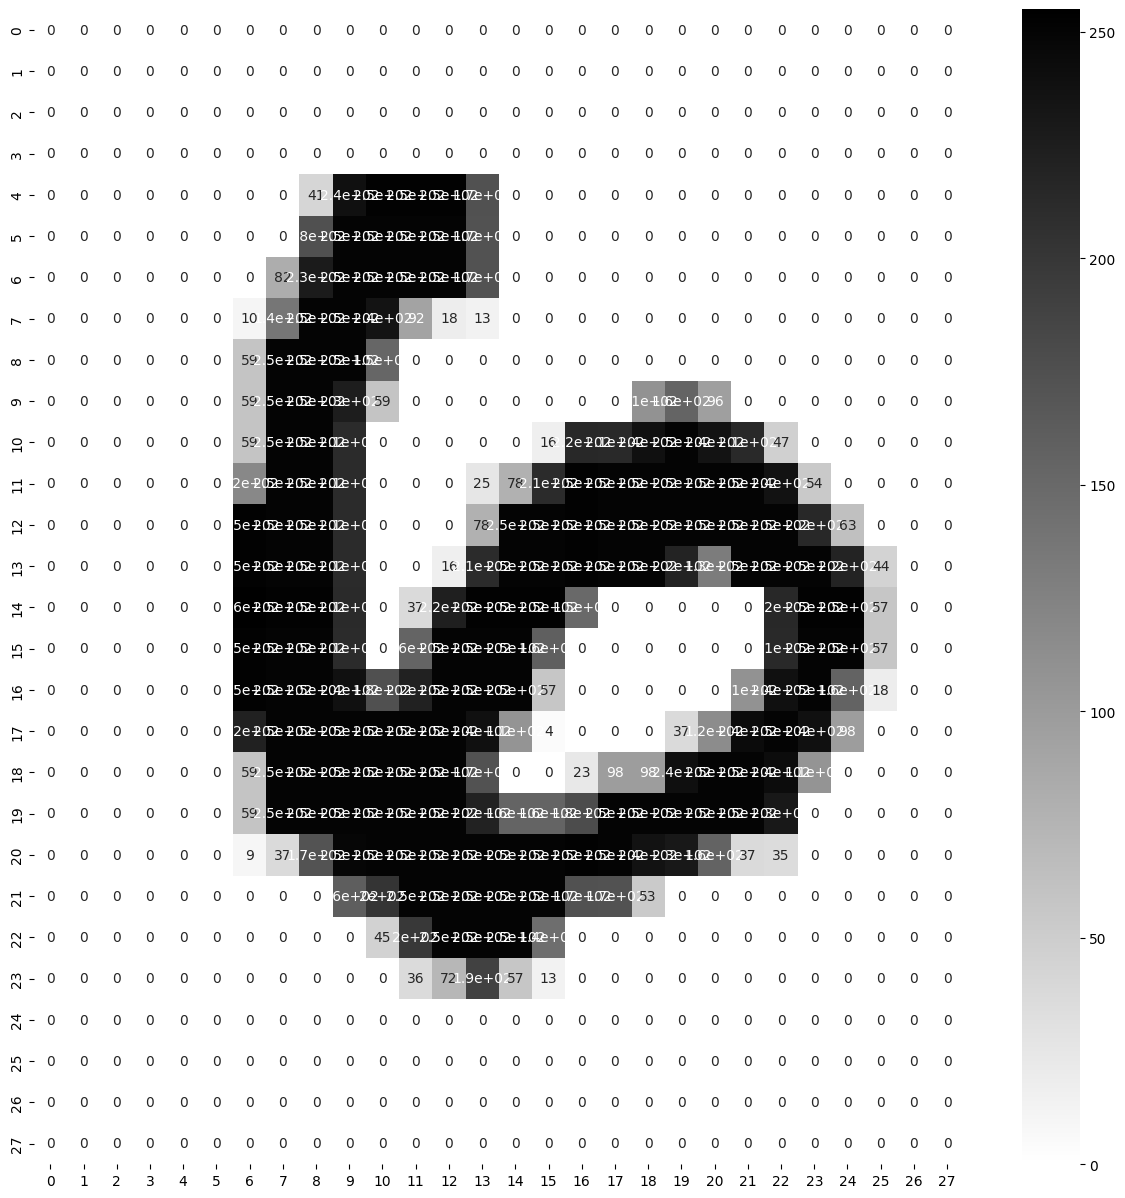

In [14]:
plt.figure(figsize=(15,15))
sns.heatmap(X_train_full [9000],annot=True , cmap='binary')

##  IT is look like a arrray , our pixles size is 0-255 . 0 is indiacted the White and 255 is indicated the Black color

* 5000 image we are going to validation and reset of image 55000 of image we are going to train

In [15]:
# scale value  unit scaling

X_valid , X_train = X_train_full[:5000]/255. , X_train_full[5000:]/255.

In [16]:
y_valid ,y_train = y_train_full[:5000],y_train_full[5000:]

* unit scaler ----> Pixel range [0-255]/255 . Why I am doing this 0-1 because NN using back propagation

In [17]:
# scale the test set as well
X_test = X_test/255.
X_test

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [18]:
print(X_valid.shape)
print(X_train.shape)
print(y_valid.shape)
print(y_train.shape)

(5000, 28, 28)
(55000, 28, 28)
(5000,)
(55000,)


<Axes: >

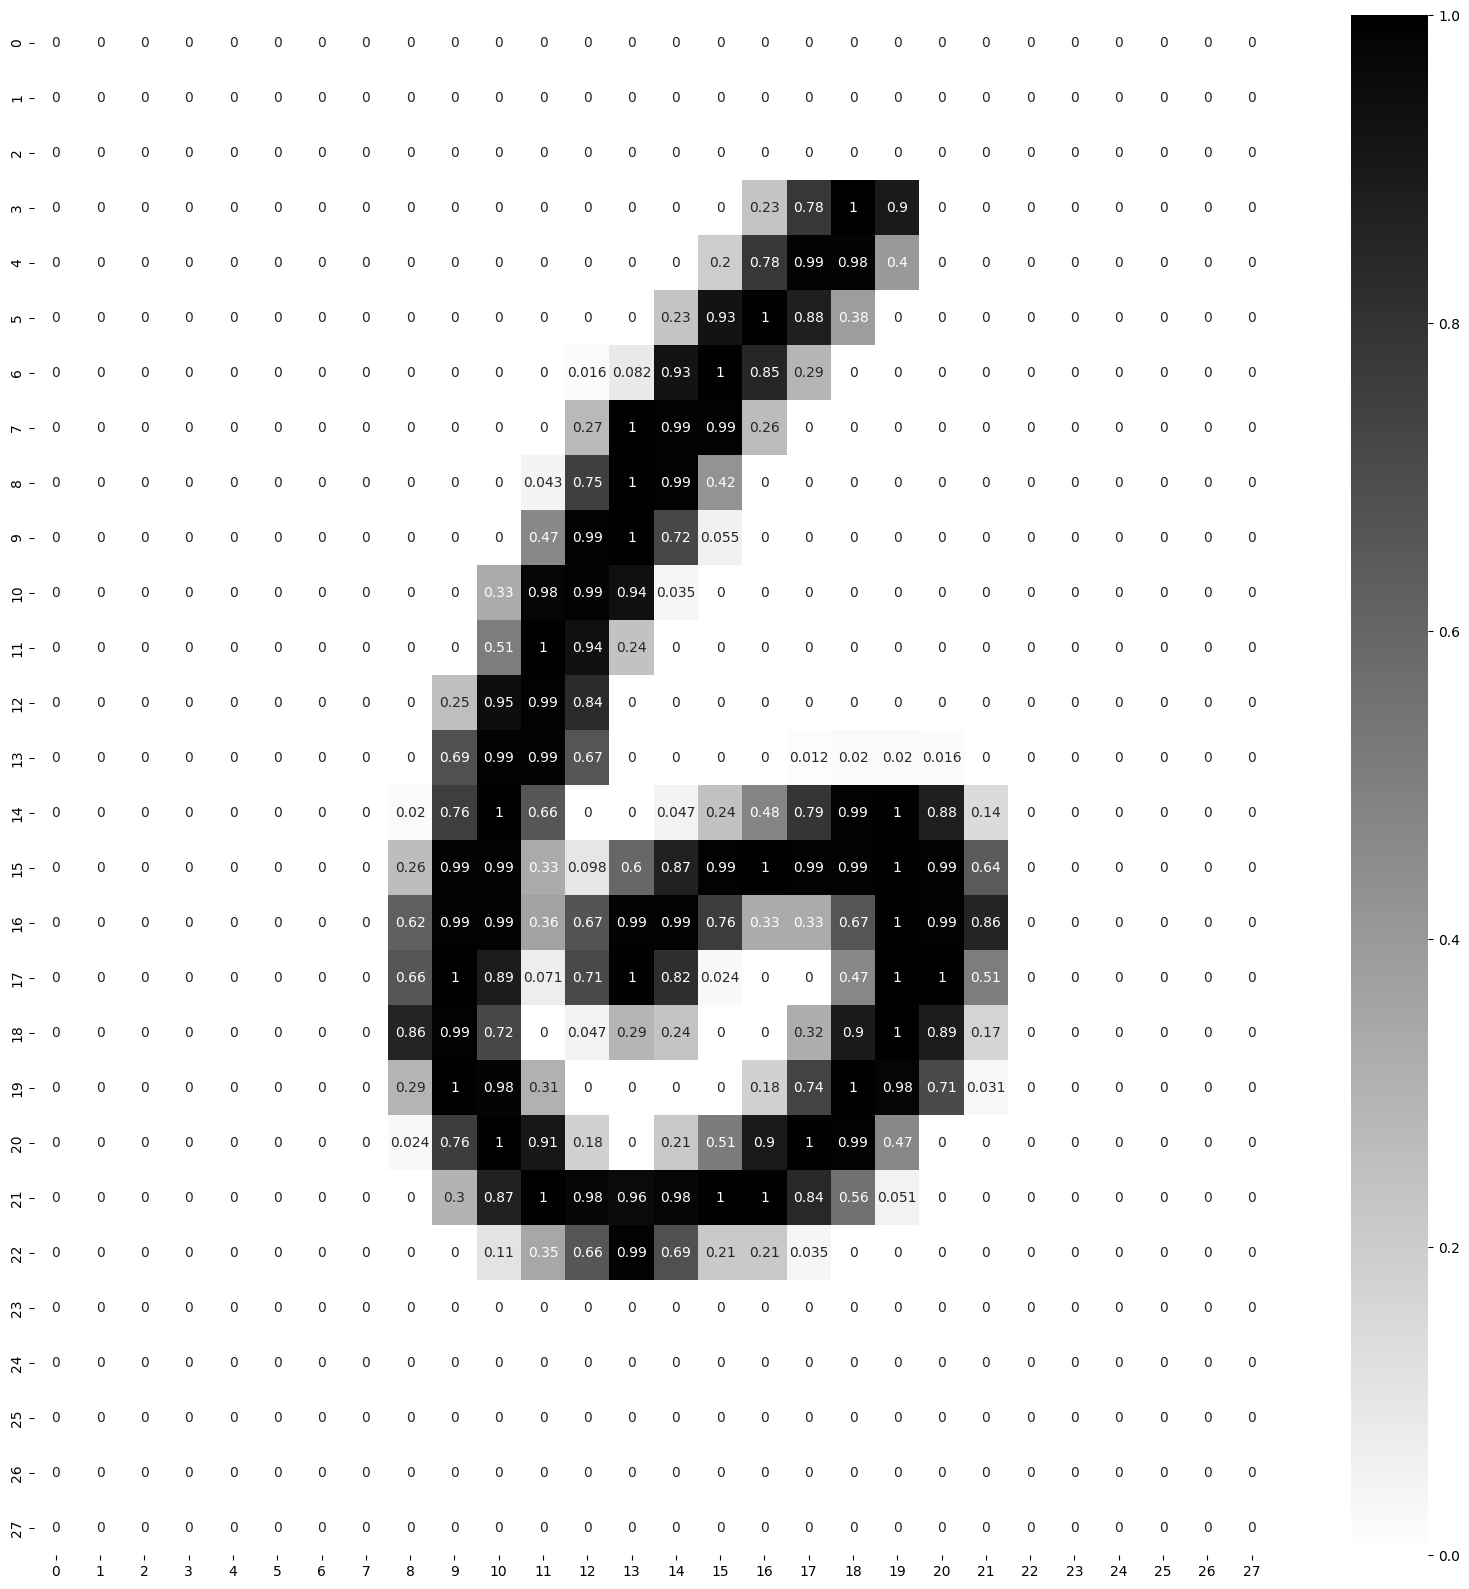

In [19]:
# normalized value

plt.figure(figsize=(20,20))
sns.heatmap(X_train[1000],annot=True,cmap='binary')

* it is indiacted the normalized value betwwen 0 - 1.

In [20]:
LAYERS = [tf.keras.layers.Flatten(input_shape=[28,28],name='inputlayer'),
          tf.keras.layers.Dense(300,activation ='relu',name='hiddenlayer1'),
          tf.keras.layers.Dense(150,activation ='relu',name='hiddenlayer3'),
          tf.keras.layers.Dense(10,activation ='softmax',name='outputlayer')]



* 10 is indiacted the hand written digit between 0-9. it classification

In [21]:
model_clf = tf.keras.models.Sequential(LAYERS)

In [22]:
model_clf

In [23]:
model_clf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputlayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenlayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenlayer3 (Dense)        (None, 150)               45150     
                                                                 
 outputlayer (Dense)         (None, 10)                1510      
                                                                 
Total params: 282160 (1.08 MB)
Trainable params: 282160 (1.08 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
# complie the model

LOSS_FUNCTION = 'sparse_categorical_crossentropy'
OPTIMIZER = 'ADAM'
METRICS = ['accuracy']


In [25]:
model_clf.compile(loss=LOSS_FUNCTION , optimizer = OPTIMIZER , metrics =METRICS )

In [26]:
model_clf.layers[1].name

'hiddenlayer1'

In [27]:
# check the weights

hidden1 = model_clf.layers[1]

In [28]:
hidden1.get_weights()

[array([[ 0.01733183,  0.02808945, -0.009335  , ..., -0.00227536,
         -0.05886693,  0.07285975],
        [ 0.01892632, -0.03796147,  0.05789353, ...,  0.05952708,
         -0.0073164 ,  0.03509988],
        [-0.05303517,  0.0630872 , -0.01020837, ...,  0.03436257,
          0.05976234, -0.03121696],
        ...,
        [ 0.00453589,  0.01816445, -0.0491046 , ...,  0.04756423,
          0.01827291, -0.00402541],
        [-0.00064087, -0.04332948,  0.03993139, ...,  0.06492381,
          0.02795339, -0.00314488],
        [-0.01520975,  0.00794373,  0.06734408, ...,  0.05755067,
          0.04326323,  0.06099898]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

* it is indicated the weights , bias

## TRian model

In [29]:
EPOCHS = 5
VALIDATION_SET = (X_valid,y_valid)
history = model_clf.fit(X_train,y_train,epochs=EPOCHS ,validation_data=VALIDATION_SET)

Epoch 1/5
1719/1719 [==============================] - 12s 4ms/step - loss: 0.2086 - accuracy: 0.9376 - val_loss: 0.1032 - val_accuracy: 0.9702
Epoch 2/5
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0890 - accuracy: 0.9722 - val_loss: 0.0848 - val_accuracy: 0.9756
Epoch 3/5
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0580 - accuracy: 0.9816 - val_loss: 0.1014 - val_accuracy: 0.9698
Epoch 4/5
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0442 - accuracy: 0.9859 - val_loss: 0.0745 - val_accuracy: 0.9798
Epoch 5/5
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0341 - accuracy: 0.9887 - val_loss: 0.0786 - val_accuracy: 0.9800


In [30]:
import time

In [31]:
# save model

def saveModel_path(model_dir ="/content/SAVED_MODELS/"):
  os.makedirs(model_dir , exist_ok=True)
  fileName = time.strftime("Model_%y_%m_%d_%H_%M_%S .h5")
  model_path = os.path.join(model_dir,fileName)
  print(f"your model will be saved at the following location\n {model_path}")
  return model_path

In [32]:
model_clf.save(saveModel_path())

your model will be saved at the following location
 /content/SAVED_MODELS/Model_23_10_18_14_50_12 .h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [34]:
history.params

{'verbose': 1, 'epochs': 5, 'steps': 1719}

In [36]:
# history of model
history.history

{'loss': [0.2086421698331833,
  0.08900490403175354,
  0.05795096606016159,
  0.04418618232011795,
  0.03406776860356331],
 'accuracy': [0.9376181960105896,
  0.9721636176109314,
  0.9816181659698486,
  0.9858909249305725,
  0.9886545538902283],
 'val_loss': [0.10318205505609512,
  0.08481074869632721,
  0.10137127339839935,
  0.0744771882891655,
  0.07858426123857498],
 'val_accuracy': [0.9702000021934509,
  0.975600004196167,
  0.9697999954223633,
  0.9797999858856201,
  0.9800000190734863]}

In [51]:
pd.DataFrame(history.history)


,loss,accuracy,val_loss,val_accuracy
0,0.208642,0.937618,0.103182,0.9702
1,0.089005,0.972164,0.084811,0.9756
2,0.057951,0.981618,0.101371,0.9698
3,0.044186,0.985891,0.074477,0.9798
4,0.034068,0.988655,0.078584,0.9800


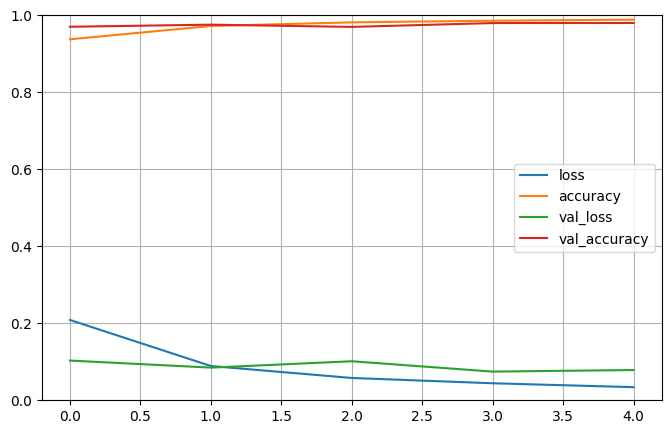

In [54]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [39]:
# accuracy
model_clf.evaluate(X_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0751 - accuracy: 0.9788


[0.07509695738554001, 0.9787999987602234]

In [55]:
model_clf.evaluate(X_test,y_test)[1]

313/313 [==============================] - 1s 4ms/step - loss: 0.0751 - accuracy: 0.9788


0.9787999987602234

In [41]:
# single image
X_test[3]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

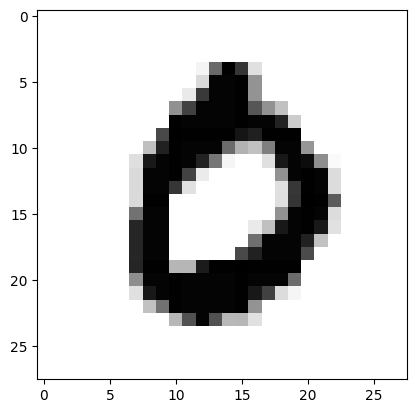

In [42]:
plt.imshow(X_test[3],cmap='binary')
plt.axis=('off')
plt.show()


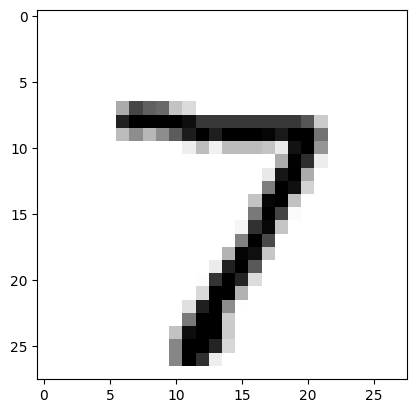

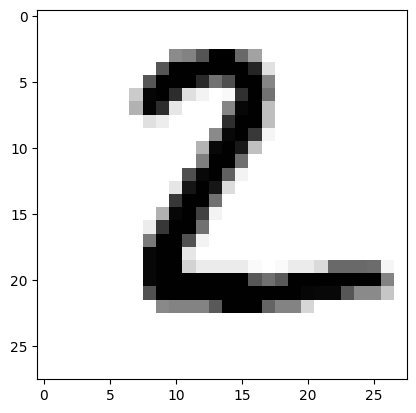

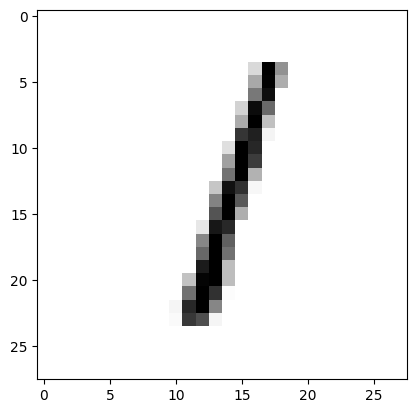

In [57]:
for i in range(0,3):
  plt.imshow(X_test[i],cmap='binary')
  #plt.axis('off')
  plt.show()

In [43]:
prediction = model_clf.predict(X_test[:3])
prediction

1/1 [==============================] - 0s 132ms/step


array([[9.5801995e-12, 1.2056547e-08, 4.3770513e-08, 1.2581093e-08,
        1.8830111e-10, 1.5346741e-11, 1.6099897e-13, 9.9999988e-01,
        9.4094676e-11, 4.5042682e-08],
       [4.3463561e-10, 2.1221597e-06, 9.9999785e-01, 1.2798691e-10,
        1.0644880e-15, 5.8582035e-15, 4.9613585e-13, 1.6805869e-09,
        3.9401832e-11, 5.8999345e-17],
       [4.2724428e-09, 9.9988544e-01, 2.1551052e-07, 6.5018156e-08,
        7.4111999e-06, 3.6122248e-07, 2.0800411e-07, 6.2260449e-05,
        4.3066259e-05, 1.0636355e-06]], dtype=float32)

* it is indiacted the probality of class

In [46]:
prediction[1]

array([4.3463561e-10, 2.1221597e-06, 9.9999785e-01, 1.2798691e-10,
       1.0644880e-15, 5.8582035e-15, 4.9613585e-13, 1.6805869e-09,
       3.9401832e-11, 5.8999345e-17], dtype=float32)

In [47]:
y_prob=prediction[0]

In [49]:
# predicted value is 7, my actual image is also 7
y_prob.round(5)

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [50]:
np.argmax(y_prob.round(5))

7

In [58]:
# create second image
prediction[1]

array([4.3463561e-10, 2.1221597e-06, 9.9999785e-01, 1.2798691e-10,
       1.0644880e-15, 5.8582035e-15, 4.9613585e-13, 1.6805869e-09,
       3.9401832e-11, 5.8999345e-17], dtype=float32)

In [59]:
y_prob = prediction[1]

In [60]:
# prediction value is 2

y_prob.round(5)

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [63]:
# actual image, maximum index
np.argmax(y_prob)

2

In [62]:
from tf.keras.models import load_model
model = load_model("/content/SAVED_MODELS")


ModuleNotFoundError: ignored

## Tensor Board

In [67]:
def get_log_path(log_dir="/content/logs/fit"):
  fileName = time.strftime('log_%Y_%m_%d_%H_%M_%S')
  log_path = os.path.join(log_dir,fileName)
  print(f"saving log at : \n {log_path}")
  return log_path

log_dir = get_log_path()

saving log at : 
 /content/logs/fit/log_2023_10_18_15_43_44


In [68]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir,histogram_freq=1)

In [69]:
# again train model

In [70]:
EPOCHS = 5
VALIDATION_SET = (X_valid,y_valid)
history = model_clf.fit(X_train,y_train,epochs=EPOCHS ,validation_data=VALIDATION_SET, callbacks=[tensorboard_callback])

Epoch 1/5
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0293 - accuracy: 0.9909 - val_loss: 0.0949 - val_accuracy: 0.9754
Epoch 2/5
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0237 - accuracy: 0.9923 - val_loss: 0.0785 - val_accuracy: 0.9818
Epoch 3/5
1719/1719 [==============================] - 8s 4ms/step - loss: 0.0208 - accuracy: 0.9930 - val_loss: 0.1019 - val_accuracy: 0.9768
Epoch 4/5
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0194 - accuracy: 0.9937 - val_loss: 0.1011 - val_accuracy: 0.9764
Epoch 5/5
1719/1719 [==============================] - 8s 4ms/step - loss: 0.0171 - accuracy: 0.9945 - val_loss: 0.0975 - val_accuracy: 0.9790


In [72]:
%load_ext tensorboard

In [73]:
%reload_ext tensorboard

In [83]:
#%tensorboard --logdir log/fit --load_fast='false' --host localhost
